Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Absolute Error: 0.00026440000002787405


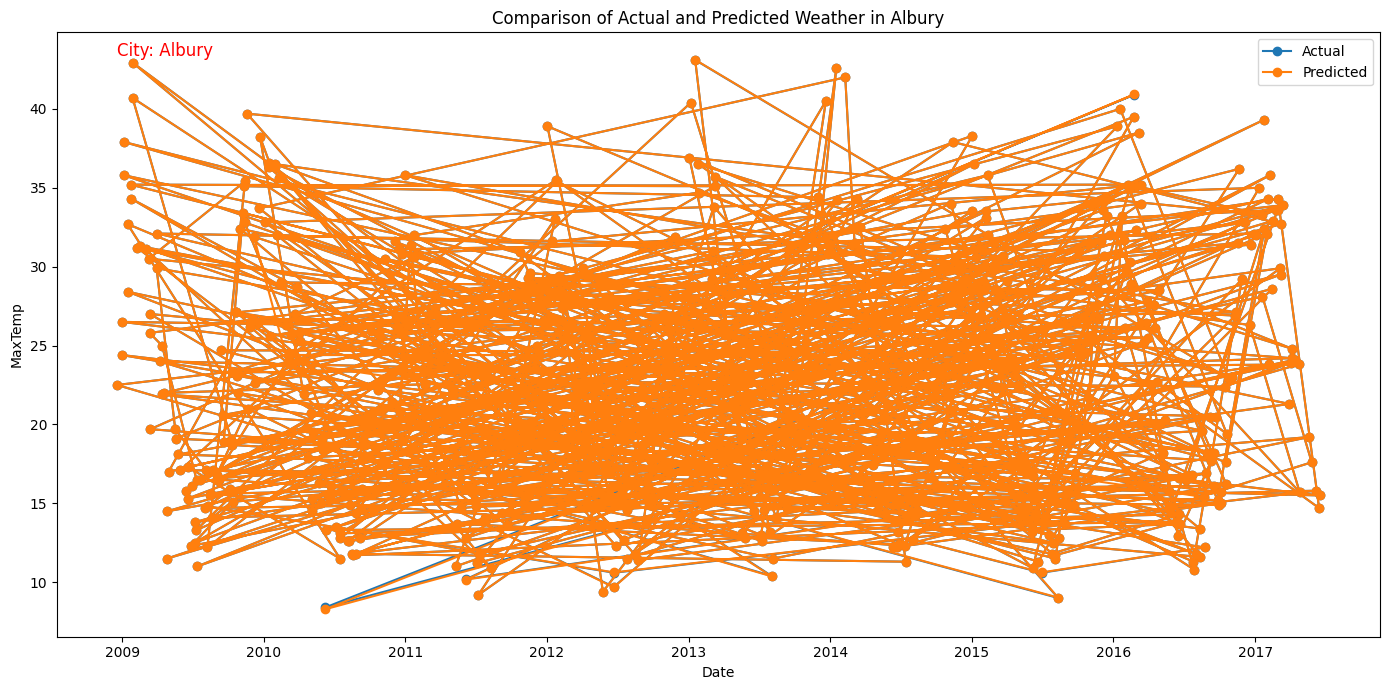

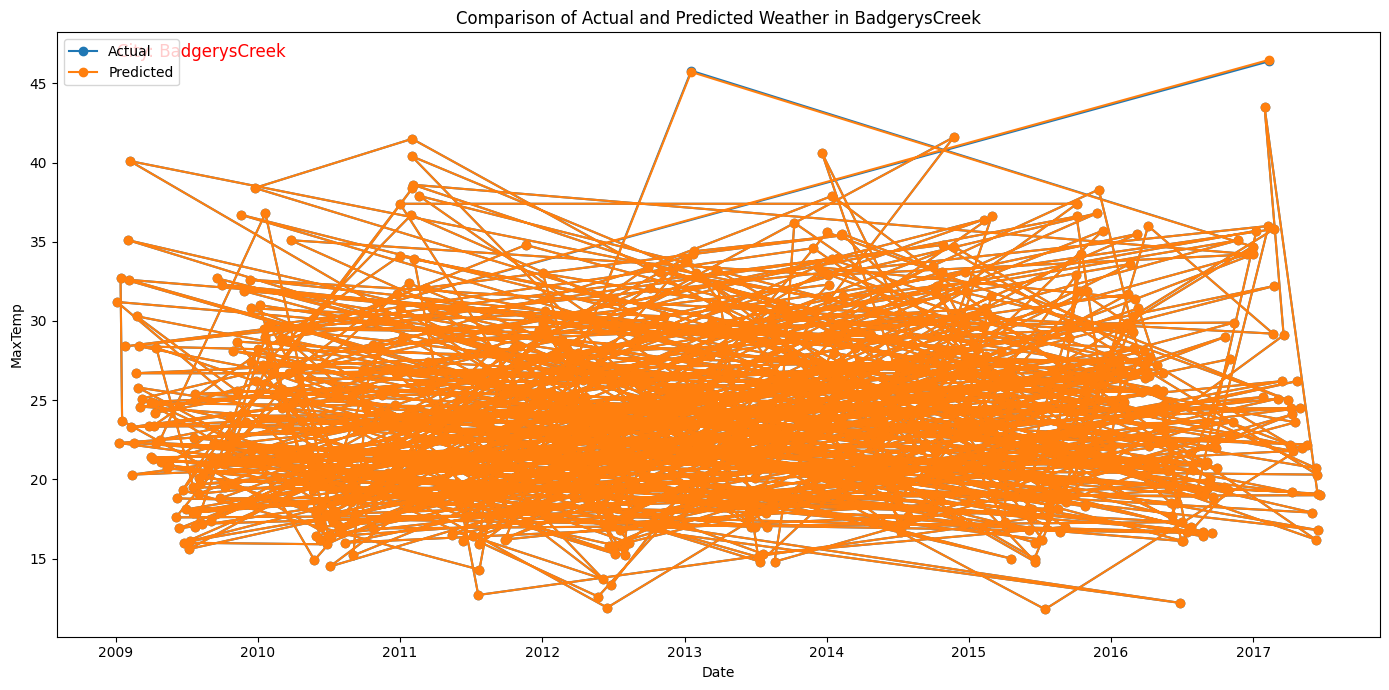

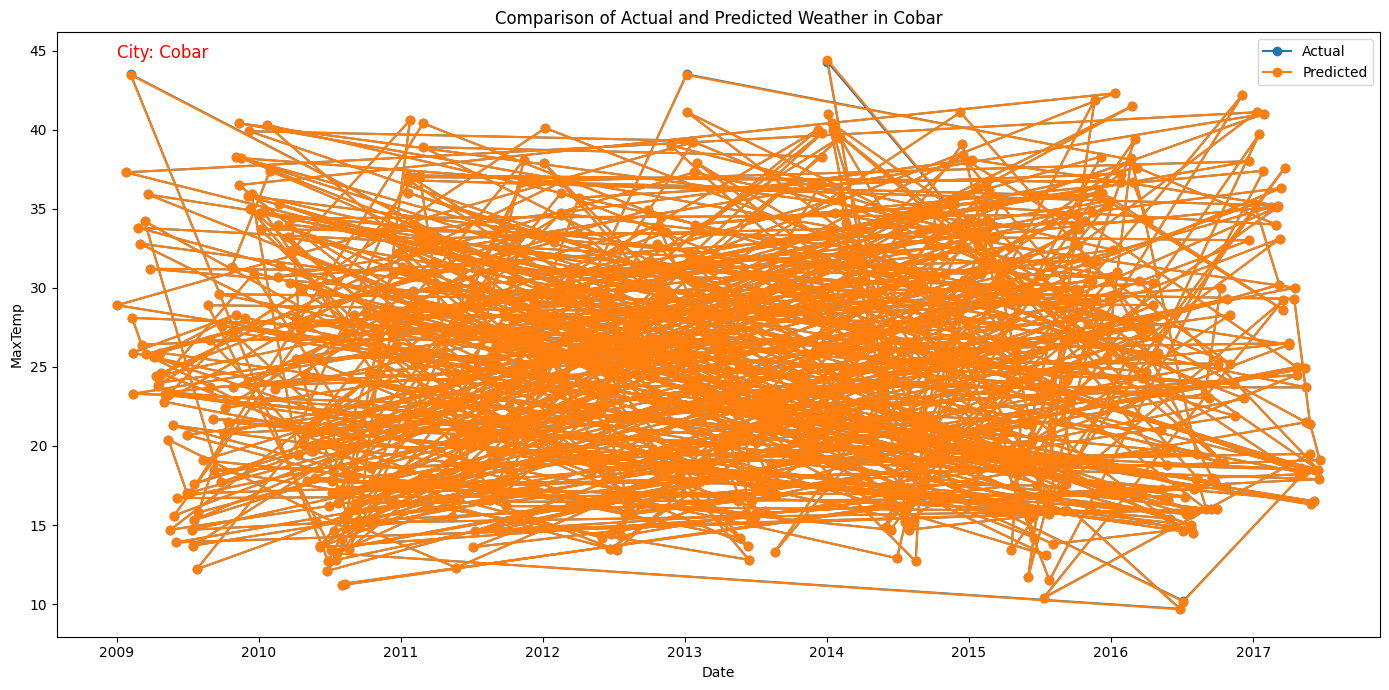

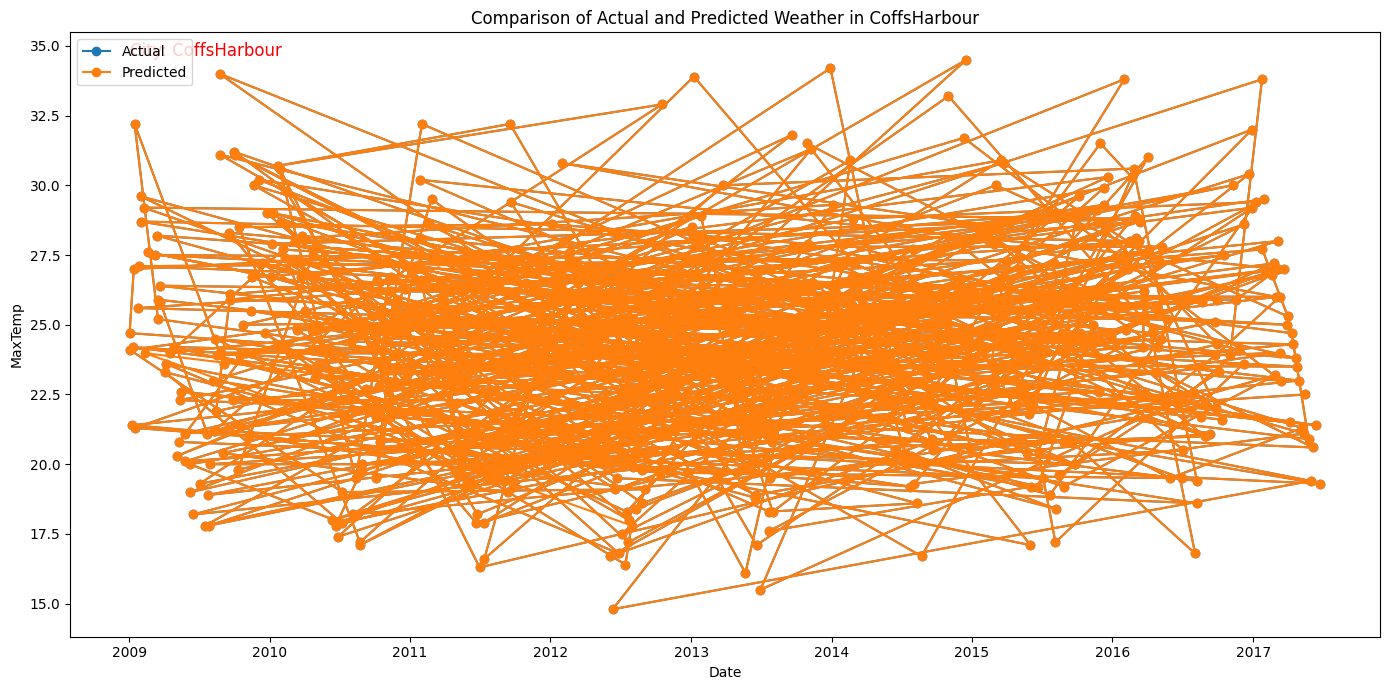

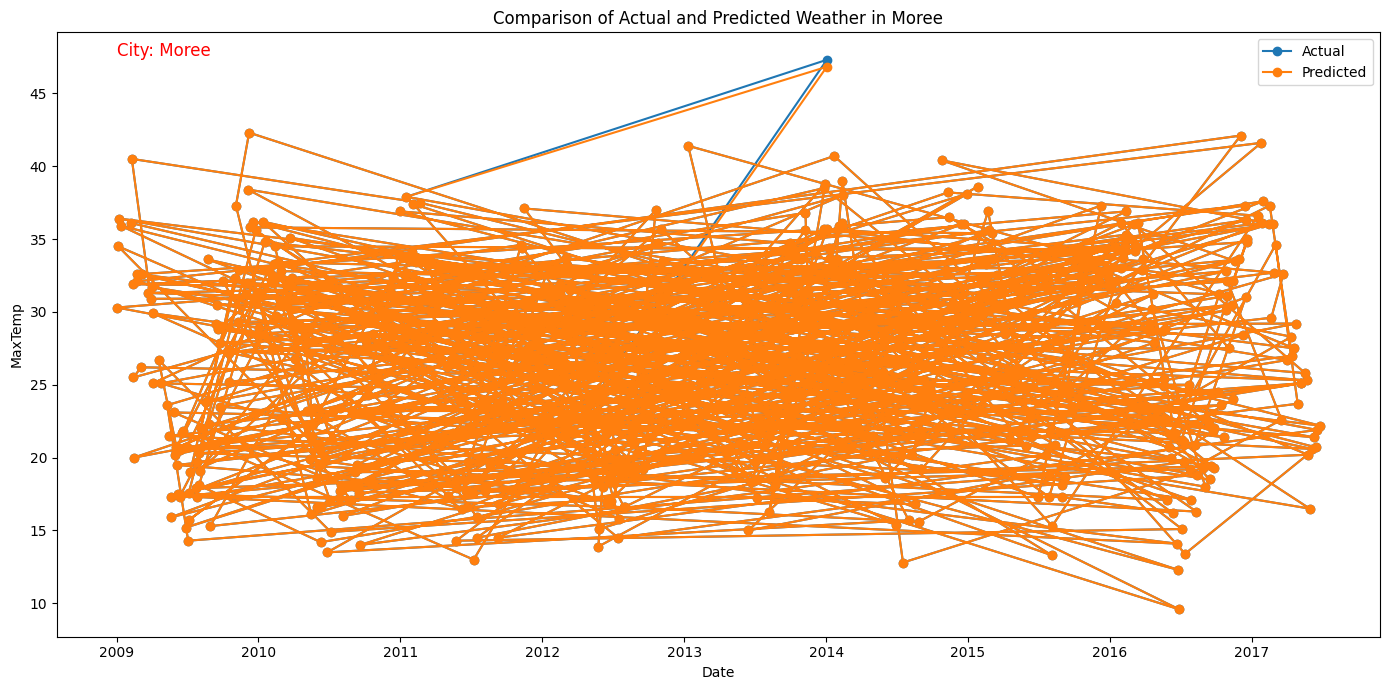

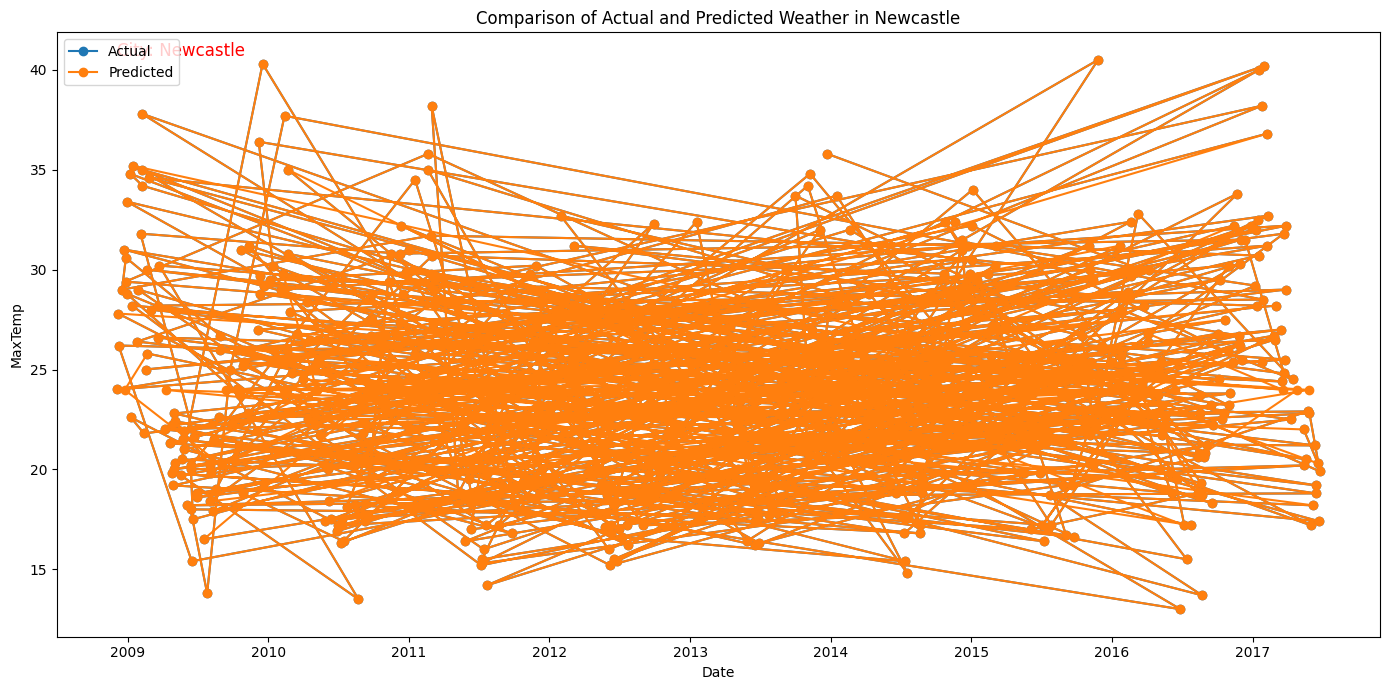

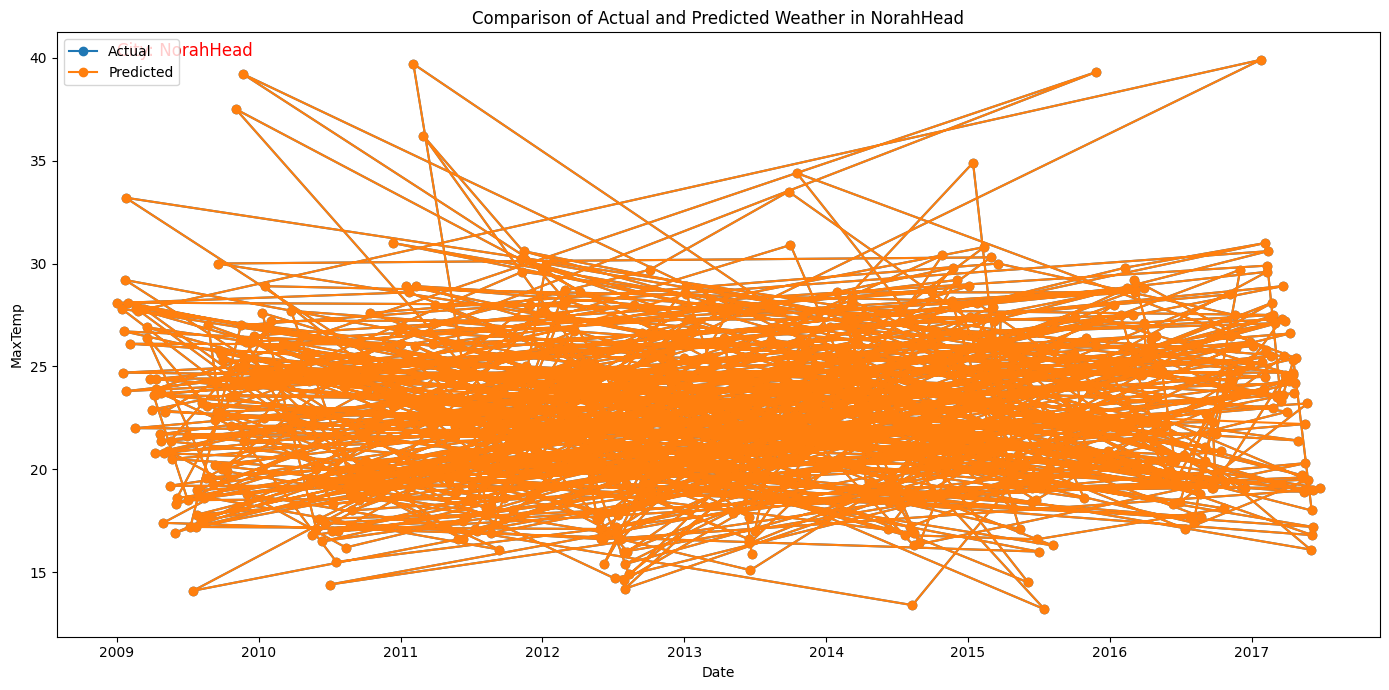

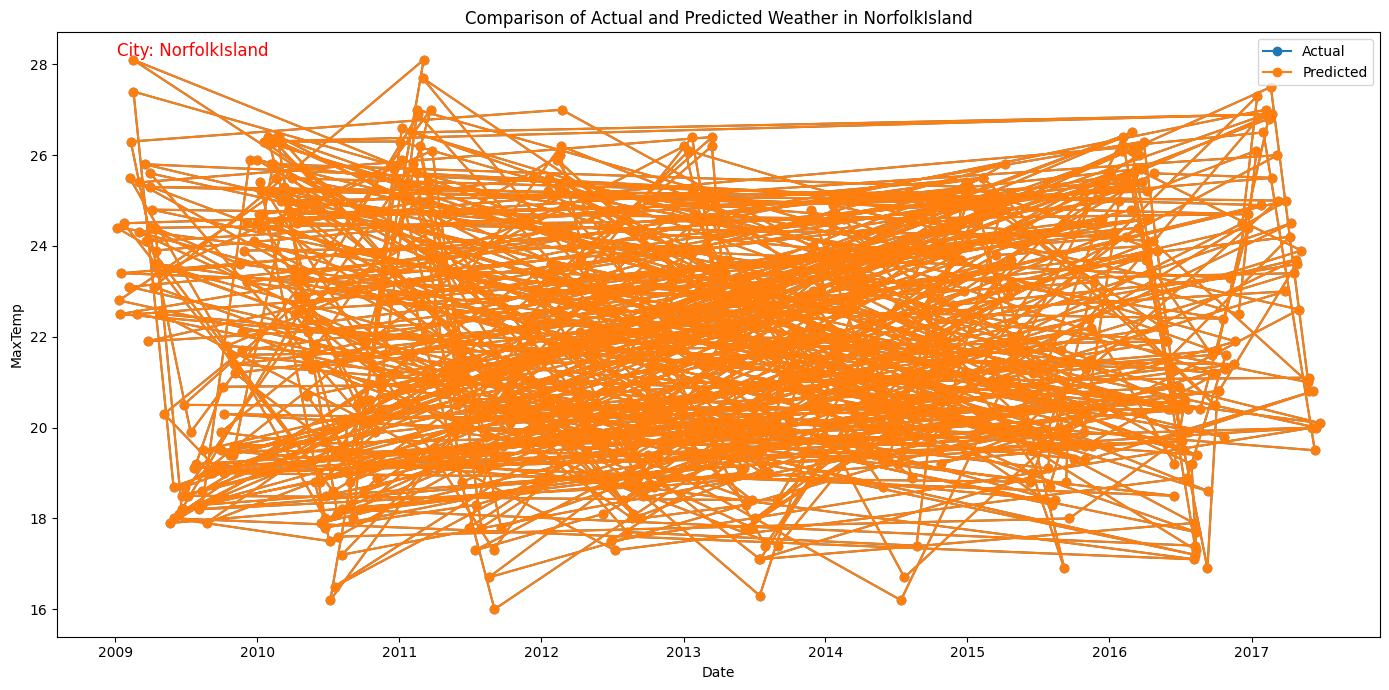

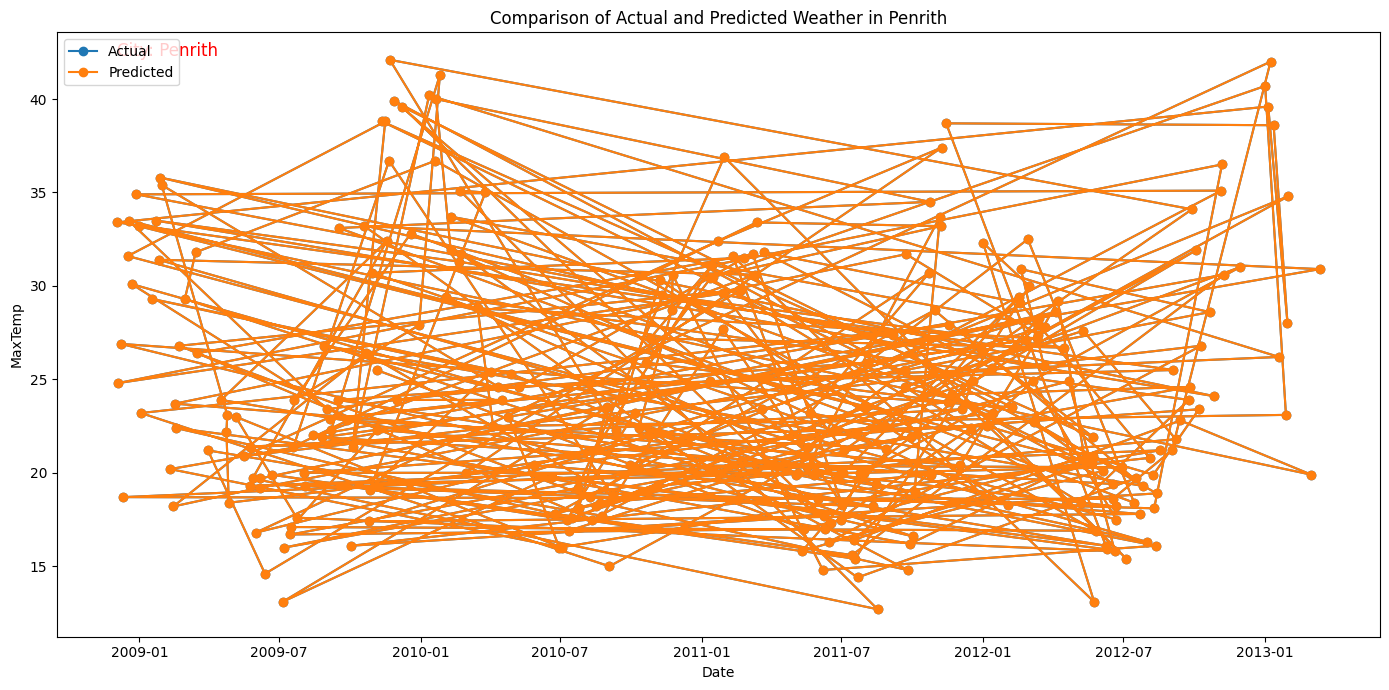

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/wheather dataset/weather.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define features and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'WindSpeed9am']
target = 'MaxTemp'

# Impute missing values in features for both training and test sets
imputer = SimpleImputer(strategy='mean')
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data[features]), columns=features)
test_data_imputed = pd.DataFrame(imputer.transform(test_data[features]), columns=features)

# Check and handle missing values in the target variable in both training and test sets
imputer_target = SimpleImputer(strategy='mean')
train_data_imputed[target] = imputer_target.fit_transform(train_data[[target]])
test_data_imputed[target] = imputer_target.transform(test_data[[target]])

# Train the model
model = RandomForestRegressor()
model.fit(train_data_imputed[features], train_data_imputed[target])

# Evaluate the model
mae = mean_absolute_error(test_data_imputed[target], predictions)
print(f'Mean Absolute Error: {mae}')

# Group by 'Location' and create individual plots
unique_cities = data['Location'].unique()

for city in unique_cities:
    city_test_data = test_data[test_data['Location'] == city]

    # Make predictions for the next year for the specific city
    city_test_data_imputed = pd.DataFrame(imputer.transform(city_test_data[features]), columns=features)
    city_predictions = model.predict(city_test_data_imputed[features])

    # Visualization
    plt.figure(figsize=(14, 7))

    # Plot actual values
    plt.plot(city_test_data['Date'], city_test_data[target], label='Actual', marker='o')

    # Plot predicted values
    plt.plot(city_test_data['Date'], city_predictions, label='Predicted', marker='o')

    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'Comparison of Actual and Predicted Weather in {city}')
    plt.legend()
    plt.tight_layout()

    # Add city name to the plot
    plt.text(city_test_data['Date'].min(), city_test_data[target].max(), f'City: {city}', fontsize=12, color='red', verticalalignment='bottom')

    plt.show()
